# Diabetes Milletus Prediction

## Steps for Data Pre-processing

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
dataset= pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Taking Care of missing Data

In [4]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Splitting Dataset into Independent variable and Dependent variable 

In [5]:
x= dataset.iloc[:,0:8].values

In [6]:
y= dataset.iloc[:,8].values

### Data Visualization

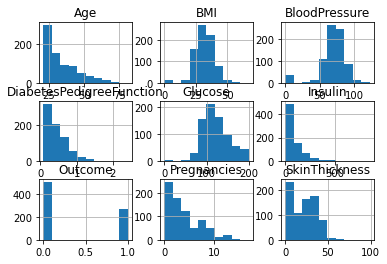

In [7]:
dataset.hist()
plt.show()

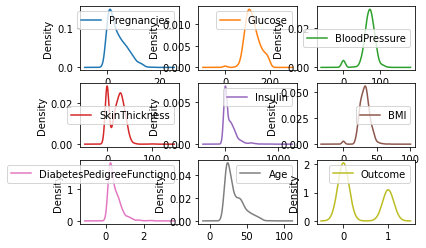

In [8]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [9]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Splitting The dataset in to Train set and Testing set

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

## Model Building

### Training and testing the model

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_predict= dt.predict(x_test)

### Evaluation

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print("\t\t  Actual Values""\n\t\t     YES","NO","\nPredicted Values","YES",cm[0],"\n\t\t  NO",cm[1])


		  Actual Values
		     YES NO 
Predicted Values YES [86 21] 
		  NO [11 36]


In [14]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score:', roc_auc_score(y_test, y_predict))

roc_auc_score: 0.7848478822827599


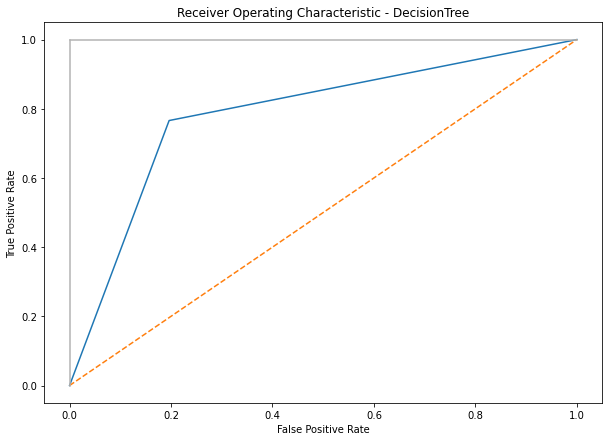

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(10,7))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], linestyle="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
import pickle
pickle.dump(dt,open('outcome.pkl','wb'))
model=pickle.load(open('outcome.pkl','rb'))